In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # For saving models


ModuleNotFoundError: No module named 'pandas'

In [ ]:

# Load the dataset
df = pd.read_csv('customer_data.csv')
df.head()

: 

In [ ]:
df.info()

: 

In [ ]:
# 1.1. Dataset Preparation
# Describe any data cleaning steps taken here
# Example: Handling missing values, removing duplicates, etc.
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

: 

In [ ]:
# 1.2. Data Visualization
# 1.2.1. Line Chart
sns.lineplot(data=df, x='age', y='spending')
plt.title('Spending by Age')
plt.show()

: 

In [ ]:
# 1.2.2. Scatter Plot
sns.scatterplot(data=df, x='income', y='spending')
plt.title('Income vs Spending')
plt.show()

: 

In [ ]:
# 1.2.3. Bar Chart
sns.barplot(data=df, x='purchase_frequency', y='spending')
plt.title('Spending by Purchase Frequency')
plt.show()

: 

In [ ]:
# Histogram
sns.histplot(df['age'])
plt.title('Age Distribution')
plt.show()


: 

In [ ]:
# Additional Plot: Boxplot
sns.boxplot(data=df, x='age', y='spending')
plt.title('Spending by Age Groups')
plt.show()

: 

In [ ]:
# Feature Selection: Select features that are most important
selected_features = ['age', 'income', 'purchase_frequency', 'spending']  


: 

In [ ]:
# Polynomial Features: Create polynomial and interaction terms
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[selected_features])


: 

In [ ]:
# Data Scaling
scaler = StandardScaler()
poly_features_scaled = scaler.fit_transform(poly_features)

: 

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(poly_features_scaled, df['spending'], test_size=0.2, random_state=42)


: 

In [ ]:
# 1.3. Architecture of the Model(s)
# Model with Regularization: Ridge Regression
ridge_model = Ridge(alpha=1.0)  # Alpha is the regularization strength; larger values specify stronger regularization

# 1.4. Training
ridge_model.fit(X_train, y_train)

: 

In [ ]:
# Save training output (model, scaler, etc.)
joblib.dump(ridge_model, 'ridge_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [ ]:
# 1.5. Testing
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2969.3496994940024


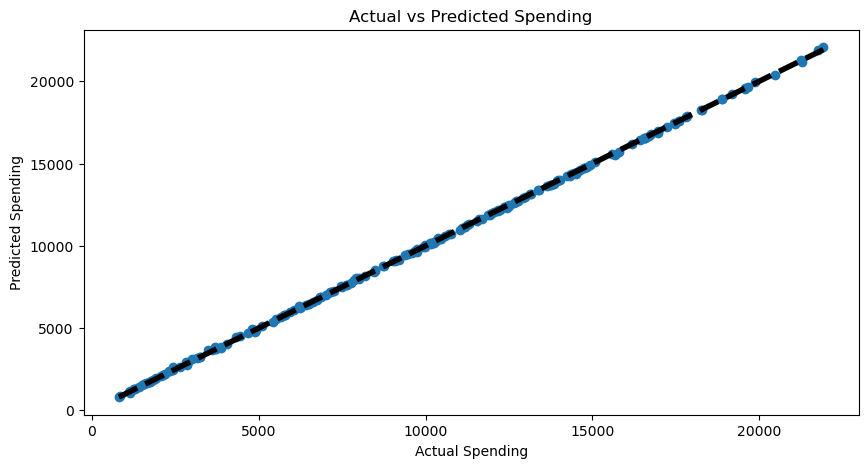

In [ ]:
# Plot actual vs predicted spending
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Spending')
plt.ylabel('Predicted Spending')
plt.title('Actual vs Predicted Spending')
plt.show()